In [1]:
from pint import UnitRegistry

ureg = UnitRegistry()
ureg.define('T = 1 * particle')
ureg.define('n = 1 * particle')

SPECIFIC_ACT = 3.57e14 *ureg.Bq * ureg.g **-1
MOLAR_MASS = 6.032/2 * ureg.g * ureg.mol**-1 

def compute_activity_rate(TBR, neutron_flux):

    T_generation_rate = TBR * neutron_flux
    T_generation_rate = T_generation_rate.to(ureg.mol * ureg.s**-1)

    activity_inrease_rate = T_generation_rate * MOLAR_MASS * SPECIFIC_ACT
    return activity_inrease_rate

def quantity_to_activity(quantity):
    return quantity * SPECIFIC_ACT * MOLAR_MASS

libra_tbr = 1.12 * ureg.T * ureg.n**-1
libra_neutron_flux = 1e10 * ureg.n * ureg.s**-1
print(f"Activity: {compute_activity_rate(libra_tbr, libra_neutron_flux): .1e}")


Activity: 2.0e+01 becquerel / second


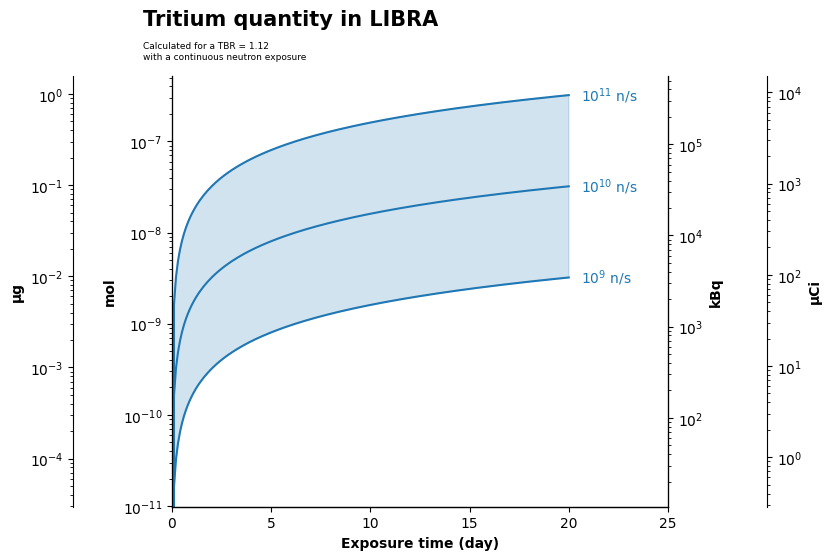

In [6]:
import matplotlib.pyplot as plt

import numpy as np
import matplotx

plt.figure(figsize=(6.4, 5.6))

def as_si(x, ndp):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    val = ""
    if m != "1":
        val = r'{m:s} \times'.format(m=m)
    val += r'10^{{{e:d}}}'.format(e=int(e))
    return val

ureg.setup_matplotlib()
 
t = np.linspace(0*ureg.days, 20*ureg.days, num=200)
quantities = []
for neutron_flux in [1e9, 1e10, 1e11] * ureg.n * ureg.s**-1:
    quantity = t * libra_tbr * neutron_flux
    quantity = quantity.to(ureg.mol)

    quantities.append(quantity)
    plt.plot(t.magnitude, quantity.magnitude, label=f"${as_si(neutron_flux.magnitude, 0)}$ {neutron_flux.units: ~P}", color="tab:blue")

plt.fill_between(t, quantities[0], quantities[-1], color="tab:blue", alpha=0.2)

plt.gcf().text(
    0.08,
    0.97,"Tritium quantity in LIBRA", weight="bold", fontsize=15)
subtitle = [
    f"Calculated for a TBR = {libra_tbr.magnitude}",
    "with a continuous neutron exposure"
]

plt.gcf().text(
    0.08, 0.91, s="\n".join(subtitle), fontsize=6.5
)
plt.yscale("log")
plt.xlim(left=0, right=20) # trick to have the labels closer to the line
matplotx.line_labels(alpha=0.05)
plt.xlim(left=0, right=25)

plt.xlabel(f"Exposure time ({t.units})", weight="bold")
plt.ylabel(f"{quantity.units: ~P}", weight="bold")

ax_mol = plt.gca()

ax_ug = ax_mol.twinx()


y1, y2 = ax_mol.get_ylim() * quantity.units
y1 *= MOLAR_MASS
y2 *= MOLAR_MASS
ax_ug.set_ylim(y1.to(ureg.microgram), y2.to(ureg.microgram))
ax_ug.set_yscale("log")
ax_ug.set_ylabel(f"{ureg.microgram: ~P}", weight="bold")


ax_ug.spines["left"].set_position(("axes", -0.2))

ax_ug.spines["left"].set_visible(True)
ax_ug.yaxis.set_label_position('left')
ax_ug.yaxis.set_ticks_position('left')
 
# kBq
ax_kbq = ax_mol.twinx()
y1, y2 =  quantity_to_activity(ax_mol.get_ylim() * quantity.units)
ax_kbq.set_ylim(y1.to(ureg.kBq), y2.to(ureg.kBq))
ax_kbq.set_yscale("log")
ax_kbq.set_ylabel(f"{ureg.kBq: ~P}", weight="bold")

# uCi
ax_uci = ax_mol.twinx()
y1, y2 = ax_kbq.get_ylim() * ureg.kBq
ax_uci.set_ylim(y1.to(ureg.microcurie), y2.to(ureg.microcurie))
ax_uci.set_yscale("log")
ax_uci.set_ylabel(f"{ureg.microcurie: ~P}", weight="bold")

ax_uci.spines["right"].set_position(("axes", +1.2))

ax_uci.spines["right"].set_visible(True)
ax_uci.yaxis.set_label_position('right')
ax_uci.yaxis.set_ticks_position('right')

for ax in [ax_mol, ax_ug, ax_kbq, ax_uci]:
    ax.figure.canvas.draw()  
    ax.spines.top.set_visible(False)

plt.savefig("libra_activity.pdf", bbox_inches='tight')
plt.savefig("libra_activity.png", bbox_inches='tight')
plt.savefig("libra_activity.svg", bbox_inches='tight')
plt.show()
